___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle

with open('golden_data_dummy.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [5]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,...,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,1432.258843,88.231744,33894.105203,0.949767,0.080187,0.133422,0.126484,0.082188,0.859239,0.155704,...,0.030754,0.471781,0.000133,0.524149,0.003936,0.051634,0.067178,0.054236,0.090127,0.736825
std,271.764876,26.617304,37284.577857,0.218434,0.271591,0.340042,0.332405,0.274660,0.347786,0.362586,...,0.172656,0.499220,0.011550,0.499433,0.062616,0.221295,0.250339,0.226491,0.286373,0.440372
min,890.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1598.000000,100.000000,49264.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [6]:
X=df.drop(["price"], axis=1)

In [7]:
y = df["price"]

In [8]:
X.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [9]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [10]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
lm.coef_

array([-1.07324683e+00,  1.00166983e+02, -3.66043273e-02, -4.31072316e+01,
       -2.11696074e+01,  2.90467232e+02,  1.47113286e+02, -4.26342916e+02,
       -2.45857390e+02,  1.44234756e+01, -2.93066855e+02, -1.16108907e+01,
       -1.62343964e+02, -2.49233364e+02,  3.14435352e+01, -8.25700143e+02,
       -1.68410690e+02, -6.39788701e+01, -2.52627947e+02, -3.36816275e+02,
       -2.21937795e+02,  6.50316165e+02,  7.88768070e+02,  5.31963200e+02,
        5.00522695e+02, -4.61395475e+02, -5.70148532e+02,  1.39061715e+02,
        1.34225323e+02,  2.11425107e+02,  1.86571437e+01, -4.13212783e+02,
        1.22899206e+02, -1.10716807e+02, -1.60110802e+03, -5.85909249e+02,
        1.44819775e+02,  9.04394102e+02, -7.91700474e+01, -8.95007277e+01,
        7.50148324e+00,  3.55613012e+02, -1.90184859e+02, -1.39196020e+03,
       -1.95752826e+02,  3.11567861e+02,  3.60531806e+01, -8.14980053e+01,
        3.51648412e+02,  3.35134852e+02, -4.18921989e+01,  2.67668171e+02,
       -2.30397964e+02,  

In [15]:
lm.intercept_

12863.602080603721

In [16]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
displacement,-1.073247
hp,100.166983
km,-0.036604
ss_abs,-43.107232
ss_adaptive_cruise_control,-21.169607
...,...
type_Demonstration,1787.860124
type_Employee's car,-1140.320012
type_New,936.704115
type_Pre-registered,-524.506129


In [17]:
y_pred=lm.predict(X_test)

In [18]:
eval_metrics(y_test, y_pred)

r2_score: 0.891767381099681 
 mae: 1672.3867626668075 
 mse: 5481554.524313214 
 rmse: 2341.271988538114


In [19]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [20]:
compare.sample(20)

,Actual,Pred
3951,20990,19480.192830
11491,19920,20542.543341
11645,17500,15439.718098
11283,15970,16380.602809
184,17445,17588.556165
8171,18690,17264.410345
15405,26000,30307.287220
6096,10650,8407.643644
11885,22989,25684.661917
5049,27230,27222.673696


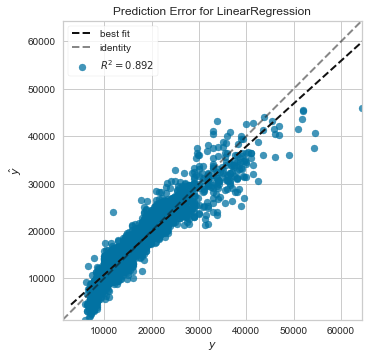

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

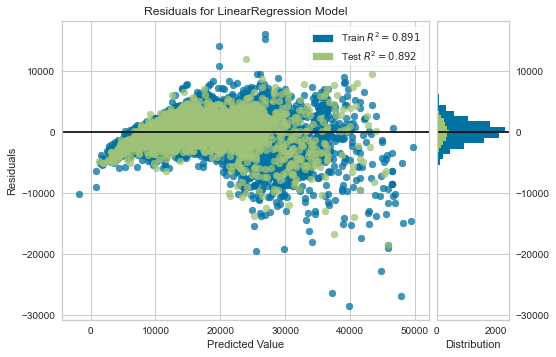

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [23]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
r2_score_cv = accuraries.mean()

In [24]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_root_mean_squared_error", cv=10)
rmse_cv = -accuraries.mean()

In [25]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
mse_cv = -accuraries.mean()

In [26]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
mae_cv = -accuraries.mean()

In [27]:
print("r2_score_cv:", r2_score_cv, "\n","mae_cv:", mae_cv, "\n","mse_cv:",mse_cv, "\n","rmse_cv:",rmse_cv)

r2_score_cv: 0.8857213142604354 
 mae_cv: 1705.2377616167353 
 mse_cv: 6037189.456297765 
 rmse_cv: 2454.188295641544


In [28]:
eval_metrics(y_test, y_pred)

r2_score: 0.891767381099681 
 mae: 1672.3867626668075 
 mse: 5481554.524313214 
 rmse: 2341.271988538114


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
11428,1598.000000,100.0,36354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
10377,1229.000000,51.0,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
9020,1333.395989,51.0,133081,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
6908,1598.000000,81.0,59800,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
12791,1598.000000,147.0,5990,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [34]:
X_train = scaler.transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
cars =pd.DataFrame(X_train, columns=X.columns)

In [37]:
cars.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,0.612334,0.435272,0.068150,0.229899,-0.297987,-0.390967,-0.383134,-0.300303,0.405165,-0.426685,...,-0.17942,1.059116,-0.009132,-1.050296,-0.064053,-0.233495,-0.268429,-0.239198,-0.313319,0.596485
1,-0.745817,-1.394091,-0.910548,0.229899,-0.297987,-0.390967,-0.383134,-0.300303,0.405165,-0.426685,...,-0.17942,-0.944184,-0.009132,0.952113,-0.064053,-0.233495,-0.268429,4.180629,-0.313319,-1.676488
2,-0.361574,-1.394091,2.672529,0.229899,-0.297987,-0.390967,-0.383134,-0.300303,0.405165,-0.426685,...,-0.17942,1.059116,-0.009132,-1.050296,-0.064053,-0.233495,-0.268429,-0.239198,-0.313319,0.596485
3,0.612334,-0.274073,0.699435,0.229899,-0.297987,-0.390967,-0.383134,-0.300303,-2.468129,2.343649,...,-0.17942,1.059116,-0.009132,-1.050296,-0.064053,-0.233495,-0.268429,-0.239198,-0.313319,0.596485
4,0.612334,2.189967,-0.749402,0.229899,-0.297987,2.557760,-0.383134,3.329971,0.405165,-0.426685,...,-0.17942,-0.944184,-0.009132,0.952113,-0.064053,4.282749,-0.268429,-0.239198,-0.313319,-1.676488


In [38]:
ridge_model = Ridge()

In [39]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [41]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917706743853188 
 mae: 1672.35069663176 
 mse: 5481387.73240731 
 rmse: 2341.236368333473


In [42]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
r2_score_cv = accuraries.mean()

In [43]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, scoring = "neg_root_mean_squared_error", cv=10)
rmse_cv = -accuraries.mean()

In [44]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
mse_cv = -accuraries.mean()

In [45]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
mae_cv = -accuraries.mean()

In [46]:
print("r2_score_cv:", r2_score_cv, "\n","mae_cv:", mae_cv, "\n","mse_cv:",mse_cv, "\n","rmse_cv:",rmse_cv)

r2_score_cv: 0.8857146457946806 
 mae_cv: 1705.220988719663 
 mse_cv: 6037583.886089434 
 rmse_cv: 2454.2704099769408


In [47]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917706743853188 
 mae: 1672.35069663176 
 mse: 5481387.73240731 
 rmse: 2341.236368333473


In [48]:
ridge_model.alpha

1.0

In [49]:
alpha_space = np.linspace(20, 100, 100)
alpha_space

array([ 20.        ,  20.80808081,  21.61616162,  22.42424242,
        23.23232323,  24.04040404,  24.84848485,  25.65656566,
        26.46464646,  27.27272727,  28.08080808,  28.88888889,
        29.6969697 ,  30.50505051,  31.31313131,  32.12121212,
        32.92929293,  33.73737374,  34.54545455,  35.35353535,
        36.16161616,  36.96969697,  37.77777778,  38.58585859,
        39.39393939,  40.2020202 ,  41.01010101,  41.81818182,
        42.62626263,  43.43434343,  44.24242424,  45.05050505,
        45.85858586,  46.66666667,  47.47474747,  48.28282828,
        49.09090909,  49.8989899 ,  50.70707071,  51.51515152,
        52.32323232,  53.13131313,  53.93939394,  54.74747475,
        55.55555556,  56.36363636,  57.17171717,  57.97979798,
        58.78787879,  59.5959596 ,  60.4040404 ,  61.21212121,
        62.02020202,  62.82828283,  63.63636364,  64.44444444,
        65.25252525,  66.06060606,  66.86868687,  67.67676768,
        68.48484848,  69.29292929,  70.1010101 ,  70.90

In [50]:
#searching for best alpha

ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 20.        ,  20.80808081,  21.61616162,  22.42424242,
        23.23232323,  24.04040404,  24.84848485,  25.65656566,
        26.46464646,  27.27272727,  28.08080808,  28.88888889,
        29.6969697 ,  30.50505051,  31.31313131,  32.12121212,
        32.92929293,  33.73737374,  34.54545455,  35.35353535,
        36.16161616,  36.96969697,  37.77777778,  38.58585859,
        39.39393939,  40.2020202 ,  41.01010101,  41.81818182,
        42...
        74.94949495,  75.75757576,  76.56565657,  77.37373737,
        78.18181818,  78.98989899,  79.7979798 ,  80.60606061,
        81.41414141,  82.22222222,  83.03030303,  83.83838384,
        84.64646465,  85.45454545,  86.26262626,  87.07070707,
        87.87878788,  88.68686869,  89.49494949,  90.3030303 ,
        91.11111111,  91.91919192,  92.72727273,  93.53535354,
        94.34343434,  95.15151515,  95.95959596,  96.76767677,
        97.57575758,  98.38383838,  99.19191919, 100.        ]),
        cv=10)

In [51]:
# best alpha
ridgecv.alpha_

87.87878787878788

In [52]:
ridge_model = Ridge(87.879).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8919996259323155 
 mae: 1669.6433688505927 
 mse: 5469792.241130833 
 rmse: 2338.758696644618


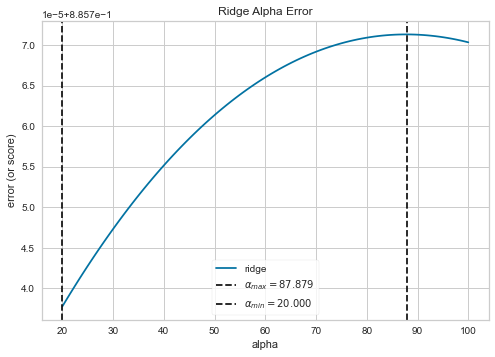

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [53]:
#let's find the same alpha with yellowbrick

from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(20, 100, 100)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [54]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
r2_score_cv = accuraries.mean()

In [55]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, scoring = "neg_root_mean_squared_error", cv=10)
rmse_cv = -accuraries.mean()

In [56]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
mse_cv = -accuraries.mean()

In [57]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
mae_cv = -accuraries.mean()

In [58]:
print("r2_score_cv:", r2_score_cv, "\n","mae_cv:", mae_cv, "\n","mse_cv:",mse_cv, "\n","rmse_cv:",rmse_cv)

r2_score_cv: 0.8857713010991196 
 mae_cv: 1701.8461510640132 
 mse_cv: 6035118.194720899 
 rmse_cv: 2453.727027458207


In [59]:
ridge_model = Ridge(87.879).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8919996259323155 
 mae: 1669.6433688505927 
 mse: 5469792.241130833 
 rmse: 2338.758696644618


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [60]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [61]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.891802701589427 
 mae: 1671.749037342123 
 mse: 5479765.681057497 
 rmse: 2340.8899335631945


In [62]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
r2_score_cv = accuraries.mean()

In [63]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, scoring = "neg_root_mean_squared_error", cv=10)
rmse_cv = -accuraries.mean()

In [64]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
mse_cv = -accuraries.mean()

In [65]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
mae_cv = -accuraries.mean()

In [66]:
print("r2_score_cv:", r2_score_cv, "\n","mae_cv:", mae_cv, "\n","mse_cv:",mse_cv, "\n","rmse_cv:",rmse_cv)

r2_score_cv: 0.8858013957087119 
 mae_cv: 1704.3408900310544 
 mse_cv: 6033065.994095099 
 rmse_cv: 2453.336543398921


In [67]:
lasso_model.alpha

1.0

In [68]:
alpha_space = np.linspace(0.1, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [69]:
lasso_cv_model.alpha_

7.6

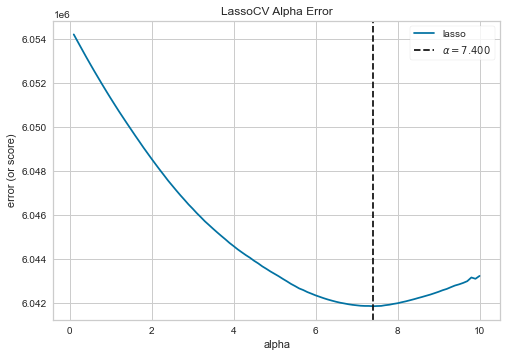

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [70]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 10, 100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [71]:
lasso_model = Lasso(7.4).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8918865409993066 
 mae: 1668.5377951501125 
 mse: 5475519.546193435 
 rmse: 2339.982808952543


In [72]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
r2_score_cv = accuraries.mean()

In [73]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, scoring = "neg_root_mean_squared_error", cv=10)
rmse_cv = -accuraries.mean()

In [74]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
mse_cv = -accuraries.mean()

In [75]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
mae_cv = -accuraries.mean()

In [76]:
print("r2_score_cv:", r2_score_cv, "\n","mae_cv:", mae_cv, "\n","mse_cv:",mse_cv, "\n","rmse_cv:",rmse_cv)

r2_score_cv: 0.8860272733480091 
 mae_cv: 1700.2939655298287 
 mse_cv: 6021831.3686060505 
 rmse_cv: 2450.9922030434436


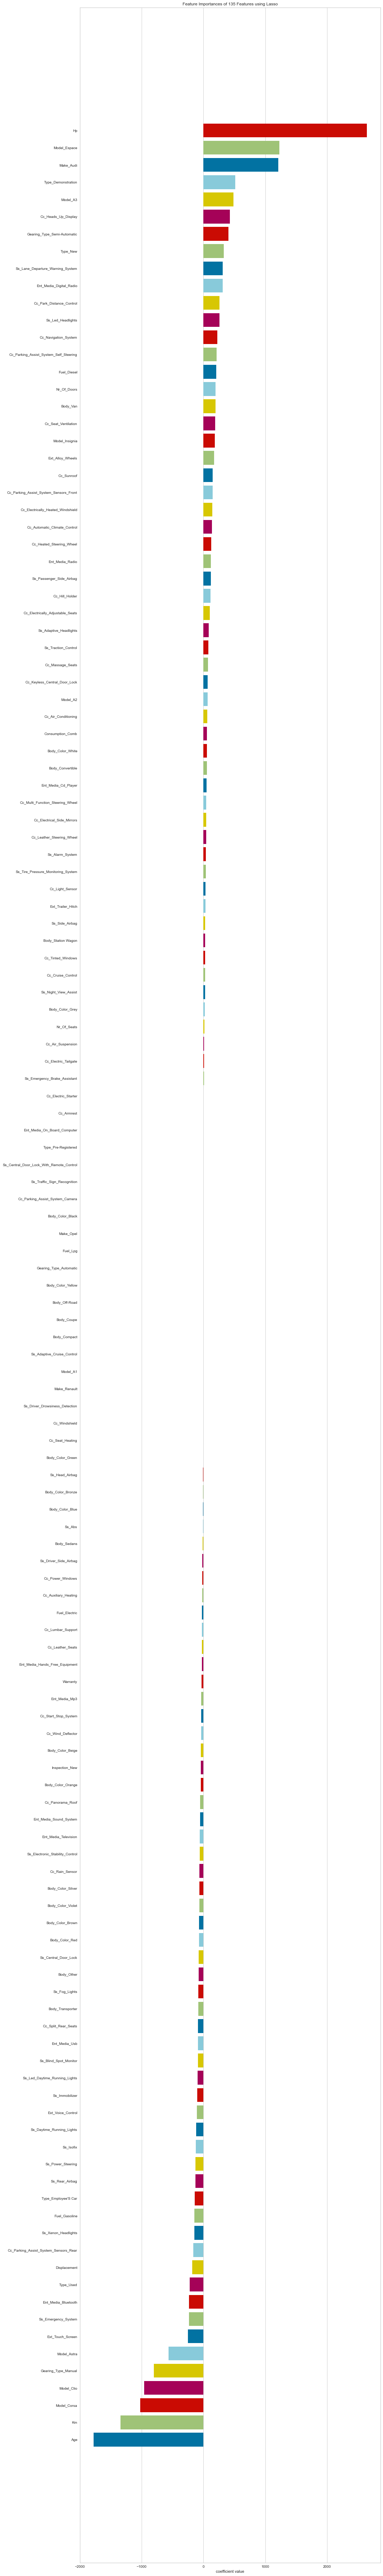

<AxesSubplot:title={'center':'Feature Importances of 135 Features using Lasso'}, xlabel='coefficient value'>

In [80]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___